## EDA And Feature Engineering Flight Price Prediction
check the dataset info below
https://www.kaggle.com/datasets/shubhambathwal/flight-price-prediction

Objective:
Analyze flight pricing data to identify key factors influencing ticket prices and build a regression model to estimate flight prices based on route, airline, stops, and travel timing.

### FEATURES
The various features of the cleaned dataset are explained below:
1) Airline: The name of the airline company is stored in the airline column. It is a categorical feature having 6 different airlines.
2) Flight: Flight stores information regarding the plane's flight code. It is a categorical feature.
3) Source City: City from which the flight takes off. It is a categorical feature having 6 unique cities.
4) Departure Time: This is a derived categorical feature obtained created by grouping time periods into bins. It stores information about the departure time and have 6 unique time labels.
5) Stops: A categorical feature with 3 distinct values that stores the number of stops between the source and destination cities.
6) Arrival Time: This is a derived categorical feature created by grouping time intervals into bins. It has six distinct time labels and keeps information about the arrival time.
7) Destination City: City where the flight will land. It is a categorical feature having 6 unique cities.
8) Class: A categorical feature that contains information on seat class; it has two distinct values: Business and Economy.
9) Duration: A continuous feature that displays the overall amount of time it takes to travel between cities in hours.
10)Days Left: This is a derived characteristic that is calculated by subtracting the trip date by the booking date.
11) Price: Target variable stores information of the ticket price.

In [27]:
#importing basics libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [28]:
!pip install pandas
!pip install matplotlib
!pip install seaborn


In [29]:
pip install openpyxl


Note: you may need to restart the kernel to use updated packages.


In [ ]:
from pathlib import Path

path = Path("data/flight_price.xlsx")
df = pd.read_excel(path)

df.head()


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
from pathlib import Path
import pandas as pd

data_path = Path("data/flight_price.xlsx")

print(data_path.exists())   # should be True

df = pd.read_excel(data_path)
df.head()


True


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [31]:
df.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [32]:
## get the basics info about data
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Airline          10683 non-null  str  
 1   Date_of_Journey  10683 non-null  str  
 2   Source           10683 non-null  str  
 3   Destination      10683 non-null  str  
 4   Route            10682 non-null  str  
 5   Dep_Time         10683 non-null  str  
 6   Arrival_Time     10683 non-null  str  
 7   Duration         10683 non-null  str  
 8   Total_Stops      10682 non-null  str  
 9   Additional_Info  10683 non-null  str  
 10  Price            10683 non-null  int64
dtypes: int64(1), str(10)
memory usage: 918.2 KB


In [33]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [34]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [35]:
## Feature Engineering
df['Date']=df['Date_of_Journey'].str.split('/').str[0]
df['Month']=df['Date_of_Journey'].str.split('/').str[1]
df['Year']=df['Date_of_Journey'].str.split('/').str[2]

In [36]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  str   
 1   Date_of_Journey  10683 non-null  str   
 2   Source           10683 non-null  str   
 3   Destination      10683 non-null  str   
 4   Route            10682 non-null  str   
 5   Dep_Time         10683 non-null  str   
 6   Arrival_Time     10683 non-null  str   
 7   Duration         10683 non-null  str   
 8   Total_Stops      10682 non-null  str   
 9   Additional_Info  10683 non-null  str   
 10  Price            10683 non-null  int64 
 11  Date             10683 non-null  object
 12  Month            10683 non-null  object
 13  Year             10683 non-null  object
dtypes: int64(1), object(3), str(10)
memory usage: 1.1+ MB


In [37]:
df['Date']=df['Date'].astype(int)
df['Month']=df['Month'].astype(int)
df['Year']=df['Year'].astype(int)

In [38]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Airline          10683 non-null  str  
 1   Date_of_Journey  10683 non-null  str  
 2   Source           10683 non-null  str  
 3   Destination      10683 non-null  str  
 4   Route            10682 non-null  str  
 5   Dep_Time         10683 non-null  str  
 6   Arrival_Time     10683 non-null  str  
 7   Duration         10683 non-null  str  
 8   Total_Stops      10682 non-null  str  
 9   Additional_Info  10683 non-null  str  
 10  Price            10683 non-null  int64
 11  Date             10683 non-null  int64
 12  Month            10683 non-null  int64
 13  Year             10683 non-null  int64
dtypes: int64(4), str(10)
memory usage: 1.1 MB


In [39]:
## Drop Date Of Journey

df.drop('Date_of_Journey',axis=1,inplace=True)

In [40]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019


In [41]:
df['Arrival_Time']=df['Arrival_Time'].apply(lambda x:x.split(' ')[0])

In [42]:
df['Arrival_hour']=df['Arrival_Time'].str.split(':').str[0]
df['Arrival_min']=df['Arrival_Time'].str.split(':').str[1]

In [43]:
df.head(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,non-stop,No info,3897,24,3,2019,01,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019,13,15


In [44]:
df['Arrival_hour']=df['Arrival_hour'].astype(int)
df['Arrival_min']=df['Arrival_min'].astype(int)

In [45]:
df.drop('Arrival_Time',axis=1,inplace=True)

In [46]:
df.head(2)

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2h 50m,non-stop,No info,3897,24,3,2019,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,7h 25m,2 stops,No info,7662,1,5,2019,13,15


In [47]:
df['Departure_hour']=df['Dep_Time'].str.split(':').str[0]
df['Departure_min']=df['Dep_Time'].str.split(':').str[1]

In [48]:
df['Departure_hour']=df['Departure_hour'].astype(int)
df['Departure_min']=df['Departure_min'].astype(int)

In [49]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Airline          10683 non-null  str  
 1   Source           10683 non-null  str  
 2   Destination      10683 non-null  str  
 3   Route            10682 non-null  str  
 4   Dep_Time         10683 non-null  str  
 5   Duration         10683 non-null  str  
 6   Total_Stops      10682 non-null  str  
 7   Additional_Info  10683 non-null  str  
 8   Price            10683 non-null  int64
 9   Date             10683 non-null  int64
 10  Month            10683 non-null  int64
 11  Year             10683 non-null  int64
 12  Arrival_hour     10683 non-null  int64
 13  Arrival_min      10683 non-null  int64
 14  Departure_hour   10683 non-null  int64
 15  Departure_min    10683 non-null  int64
dtypes: int64(8), str(8)
memory usage: 1.3 MB


In [50]:
df.drop('Dep_Time',axis=1,inplace=True)

In [51]:
df.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Departure_hour,Departure_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,13,15,5,50


In [52]:
df['Total_Stops'].unique()

<StringArray>
['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops']
Length: 6, dtype: str

In [53]:
df[df['Total_Stops'].isnull()]

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Departure_hour,Departure_min
9039,Air India,Delhi,Cochin,NaN,23h 40m,NaN,No info,7480,6,5,2019,9,25,9,45


In [54]:
df['Total_Stops'].mode()

0    1 stop
Name: Total_Stops, dtype: str

In [55]:
df['Total_Stops'].unique()

<StringArray>
['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops']
Length: 6, dtype: str

In [56]:
df['Total_Stops']=df['Total_Stops'].map({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4,np.nan:1})

In [57]:
df[df['Total_Stops'].isnull()]

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Departure_hour,Departure_min


In [58]:
df.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Departure_hour,Departure_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,0,No info,3897,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2,No info,7662,1,5,2019,13,15,5,50


In [59]:
df.drop('Route',axis=1,inplace=True)

In [60]:
df.head(2)

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Departure_hour,Departure_min
0,IndiGo,Banglore,New Delhi,2h 50m,0,No info,3897,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,7h 25m,2,No info,7662,1,5,2019,13,15,5,50


In [61]:
df['Duration'].str.split(' ').str[0].str.split('h').str[0]

0         2
1         7
2        19
3         5
4         4
         ..
10678     2
10679     2
10680     3
10681     2
10682     8
Name: Duration, Length: 10683, dtype: object

In [62]:
df['Airline'].unique()

<StringArray>
[                           'IndiGo',                         'Air India',
                       'Jet Airways',                          'SpiceJet',
                 'Multiple carriers',                             'GoAir',
                           'Vistara',                          'Air Asia',
           'Vistara Premium economy',              'Jet Airways Business',
 'Multiple carriers Premium economy',                            'Trujet']
Length: 12, dtype: str

In [63]:
df['Source'].unique()

<StringArray>
['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai']
Length: 5, dtype: str

In [64]:
df['Additional_Info'].unique()

<StringArray>
[                     'No info',  'In-flight meal not included',
 'No check-in baggage included',              '1 Short layover',
                      'No Info',               '1 Long layover',
              'Change airports',               'Business class',
               'Red-eye flight',               '2 Long layover']
Length: 10, dtype: str

In [68]:
!python -m pip install scikit-learn


  Using cached scikit_learn-1.8.0-cp313-cp313-win_amd64.whl.metadata (11 kB)
  Using cached scipy-1.17.0-cp313-cp313-win_amd64.whl.metadata (60 kB)
  Using cached joblib-1.5.3-py3-none-any.whl.metadata (5.5 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.8.0-cp313-cp313-win_amd64.whl (8.0 MB)
Using cached joblib-1.5.3-py3-none-any.whl (309 kB)
Using cached scipy-1.17.0-cp313-cp313-win_amd64.whl (36.3 MB)
Using cached threadpoolctl-3.6.0-py3-none-any.whl (18 kB)

   ---------- ----------------------------- 1/4 [scipy]
   ---------- ----------------------------- 1/4 [scipy]
   ---------- ----------------------------- 1/4 [scipy]
   ---------- ----------------------------- 1/4 [scipy]
   ---------- ----------------------------- 1/4 [scipy]
   ---------- ----------------------------- 1/4 [scipy]
   ---------- ----------------------------- 1/4 [scipy]
   ---------- ----------------------------- 1/4 [scipy]
   ---------- ------------------

In [69]:
from sklearn.preprocessing import OneHotEncoder

In [70]:
encoder=OneHotEncoder()

In [71]:
encoder.fit_transform(df[['Airline','Source','Destination']]).toarray()

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.]], shape=(10683, 23))

Nominal features such as airline and route were one-hot encoded to avoid imposing artificial order, while number of stops was ordinal-encoded to preserve natural ranking

In [72]:
pd.DataFrame(encoder.fit_transform(df[['Airline','Source','Destination']]).toarray(),columns=encoder.get_feature_names_out())

,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
10679,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
10680,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
10681,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [80]:
categorical_cols = df.select_dtypes(include="object").columns
categorical_cols


C:\Users\PC-FMS\AppData\Local\Temp\ipykernel_11976\1298146847.py:1: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  categorical_cols = df.select_dtypes(include="object").columns


Index(['Airline', 'Source', 'Destination', 'Duration', 'Additional_Info'], dtype='str')

In [81]:
df_encoded = pd.get_dummies(
    df,
    columns=categorical_cols,
    drop_first=True
)


In [82]:
X = df_encoded.drop("Price", axis=1)
y = df_encoded["Price"]


In [83]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)


In [84]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(
    n_estimators=200,
    random_state=42,
    n_jobs=-1
)

rf_model.fit(X_train, y_train)


,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",200
,"criterion criterion: {""squared_error"", ""absolute_error"", ""friedman_mse"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in Poisson deviance to find splits.Training using ""absolute_error"" is significantly slowerthan when using ""squared_error""... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 1.0 Poisson criterion.",'squared_error'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=1.0The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None or 1.0, then `max_features=n_features`... note:: The default of 1.0 is equivalent to bagged trees and more randomness can be achieved by setting smaller values, e.g. 0.3... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to 1.0.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",1.0
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsample

In [85]:
print(rf_model)


RandomForestRegressor(n_estimators=200, n_jobs=-1, random_state=42)


In [86]:
importance_df = pd.DataFrame({
    "Feature": X.columns,
    "Importance": rf_model.feature_importances_
}).sort_values(by="Importance", ascending=False)

importance_df.head(10)


,Feature,Importance
0,Total_Stops,0.411633
1,Date,0.090453
399,Additional_Info_In-flight meal not included,0.077391
11,Airline_Jet Airways,0.072069
12,Airline_Jet Airways Business,0.063559
2,Month,0.047328
27,Destination_New Delhi,0.025726
4,Arrival_hour,0.022997
13,Airline_Multiple carriers,0.020668
10,Airline_IndiGo,0.018751


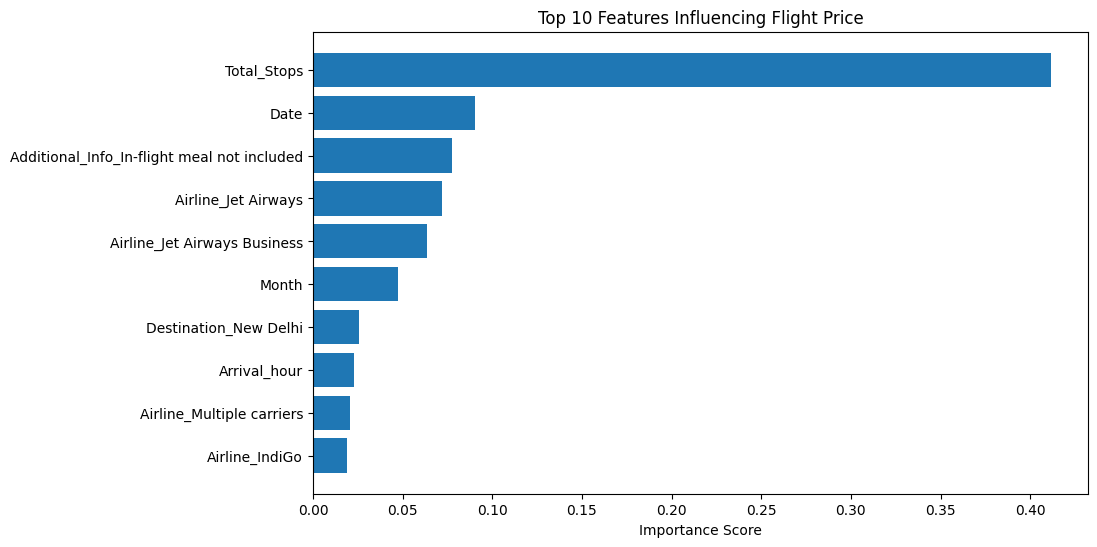

In [88]:
plt.figure(figsize=(10, 6))
plt.barh(
    importance_df["Feature"][:10][::-1],
    importance_df["Importance"][:10][::-1]
)
plt.xlabel("Importance Score")
plt.title("Top 10 Features Influencing Flight Price")
plt.show()




The number of stops is the strongest driver of flight prices, followed by airline-specific and route-related features. Tree-based models effectively capture non-linear interactions in pricing behavior, making them suitable for this problem.


In [1]:
print("Model trained successfully")


Model trained successfully
